In [15]:
# clasificacion_corazon.py

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Cargar datos
df = pd.read_csv("../data/heart_disease_uci.csv")

In [16]:
print("Columnas:", df.columns)
print("Valores únicos en 'num':", df['num'].unique())
print(df.info())
print(df.isnull().sum())

Columnas: Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')
Valores únicos en 'num': [0 2 1 3 4]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num     

In [17]:
# Crear columna binaria 'target': 1 = enfermedad, 0 = sano
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

# Eliminar columnas que no aportan
df = df.drop(columns=['id', 'dataset', 'num'])

# Exploración adicional: distribución del target
print(df['target'].value_counts())

target
1    509
0    411
Name: count, dtype: int64


In [18]:
# Encoding si hay columnas categóricas
df = pd.get_dummies(df, drop_first=True)

# Separar variables predictoras y target
X = df.drop('target', axis=1)
y = df['target']

In [19]:
# Escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [20]:
# Entrenar modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

In [21]:
# Evaluación
print("\n📊 Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\n📈 Reporte de Clasificación:")
print(classification_report(y_test, y_pred))


📊 Matriz de Confusión:
[[65 10]
 [16 93]]

📈 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        75
           1       0.90      0.85      0.88       109

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



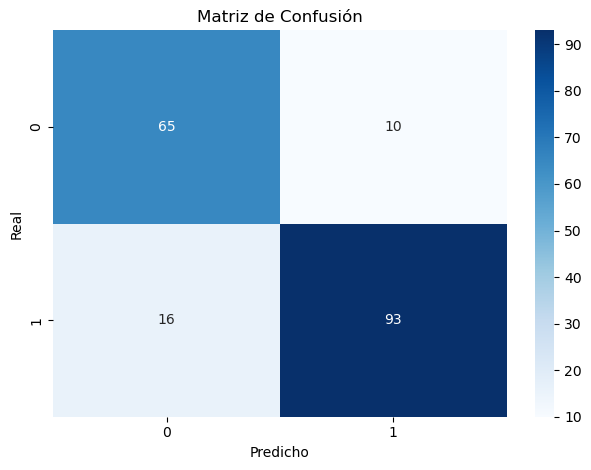

In [22]:
# Visualización: matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.title('Matriz de Confusión')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.tight_layout()
plt.show()

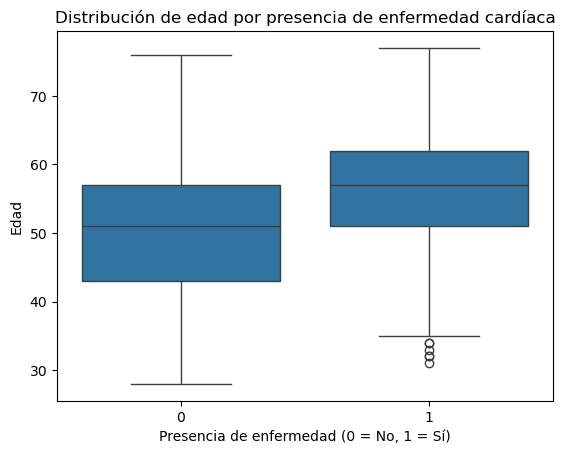

In [23]:
# Boxplot edad vs enfermedad
sns.boxplot(x='target', y='age', data=df)
plt.title('Distribución de edad por presencia de enfermedad cardíaca')
plt.xlabel('Presencia de enfermedad (0 = No, 1 = Sí)')
plt.ylabel('Edad')
plt.show()

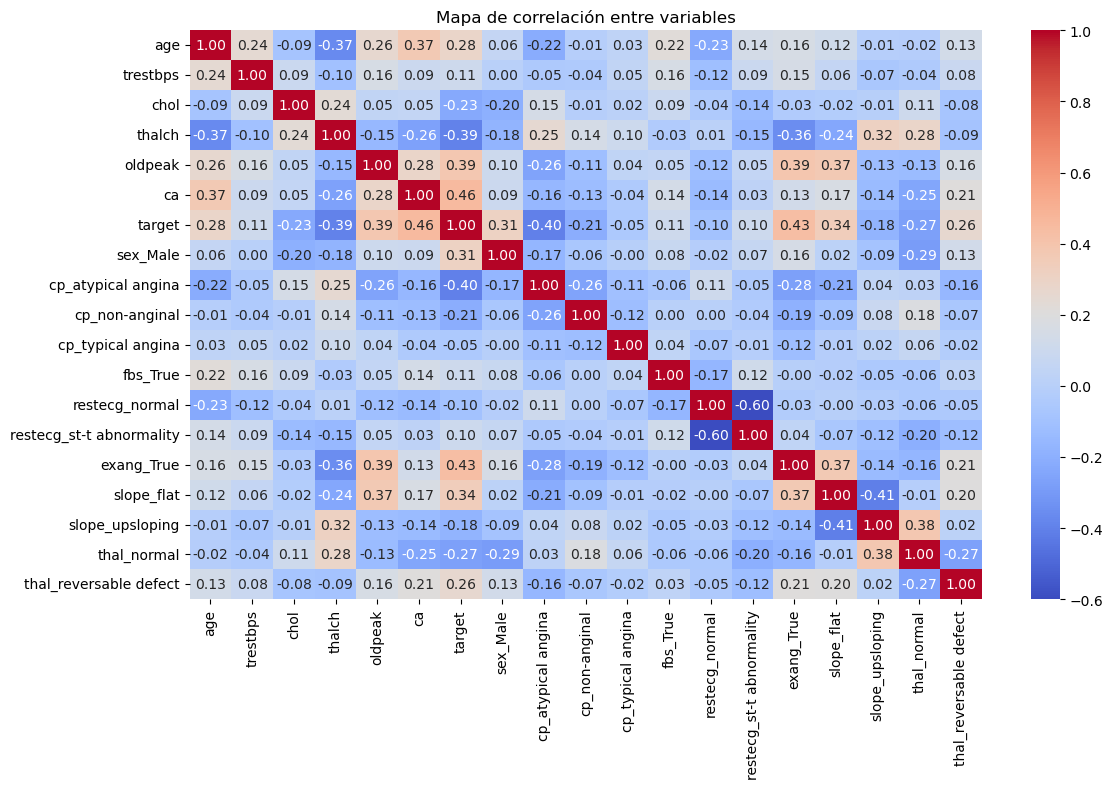

In [24]:
# Mapa de calor de correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de correlación entre variables')
plt.tight_layout()
plt.show()

In [25]:
# Comentario interpretativo:
print("\n🔍 Comentario: El modelo predice correctamente la mayoría de los casos. La matriz muestra que los falsos negativos son bajos, lo cual es fundamental en problemas de salud.")


🔍 Comentario: El modelo predice correctamente la mayoría de los casos. La matriz muestra que los falsos negativos son bajos, lo cual es fundamental en problemas de salud.
